# Introduction to convolutional Neural Networks and Computer Vision with TensorFlow

Computer vision is the pratice of writing algorithms which can discover patterns in visual data. Such as the camera of a self-driving car recognizing the car in front.

## Get the data

The images are from the Food101 dataset.
However we are only using two classes (pizza and steak)

We start with a smaller dataset se we can experiment quickly and figure out what works and what doesn't work before escaling up.

In [13]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2023-04-05 01:48:15--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.127.128, 172.217.218.128, 142.250.153.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.127.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.1’

pizza_steak.zip.1   100%[===================>] 104.47M  33.4MB/s    in 3.1s    

2023-04-05 01:48:18 (33.4 MB/s) - ‘pizza_steak.zip.1’ saved [109540975/109540975]



## Inspect the data

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train

pizza  steak


In [ ]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [ ]:
import os

# Walk through pizz_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

There are 2 directories and 0 images in 'pizza_steak'
There are 2 directories and 0 images in 'pizza_steak/test'
There are 0 directories and 250 images in 'pizza_steak/test/steak'
There are 0 directories and 250 images in 'pizza_steak/test/pizza'
There are 2 directories and 0 images in 'pizza_steak/train'
There are 0 directories and 750 images in 'pizza_steak/train/steak'
There are 0 directories and 750 images in 'pizza_steak/train/pizza'


In [ ]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

To visualize our images, first let's get the class names programmatically 

In [23]:
# Get the classname programmatically 
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
# Create a list of class names from sub-directories
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) 
class_names

array(['pizza', 'steak'], dtype='<U5')

In [5]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

def view_random_image(target_dir, target_class):
  # Setup the target directory
  target_folder = target_dir + target_class

  # Get a random image
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")
  # show the shape of image
  print(f"Image shape {img.shape}")
  return img

In [ ]:
# View a random image from the training set
img = view_random_image(target_dir="pizza_steak/train/", target_class="steak")

Image shape (384, 512, 3)


In [ ]:
img

array([[[213, 217, 220],
        [213, 217, 220],
        [213, 217, 220],
        ...,
        [ 73,  77,  86],
        [ 73,  77,  86],
        [ 73,  77,  86]],

       [[214, 218, 221],
        [214, 218, 221],
        [213, 217, 220],
        ...,
        [ 73,  77,  86],
        [ 73,  77,  86],
        [ 73,  77,  86]],

       [[215, 219, 222],
        [215, 219, 222],
        [215, 219, 222],
        ...,
        [ 73,  77,  86],
        [ 73,  77,  86],
        [ 73,  77,  86]],

       ...,

       [[113, 117, 128],
        [112, 116, 127],
        [112, 116, 127],
        ...,
        [ 57,  60,  65],
        [ 57,  60,  65],
        [ 57,  60,  65]],

       [[113, 117, 128],
        [111, 115, 126],
        [111, 115, 126],
        ...,
        [ 57,  60,  65],
        [ 57,  60,  65],
        [ 57,  60,  65]],

       [[110, 114, 125],
        [108, 112, 123],
        [107, 111, 122],
        ...,
        [ 57,  60,  65],
        [ 57,  60,  65],
        [ 57,  60,  65]]

In [ ]:
# View the image shape
img.shape # Returns width, height, color channels 

(384, 512, 3)

In [ ]:
# Get all the pixel values between 0 & 1
img/255 

array([[[0.83529412, 0.85098039, 0.8627451 ],
        [0.83529412, 0.85098039, 0.8627451 ],
        [0.83529412, 0.85098039, 0.8627451 ],
        ...,
        [0.28627451, 0.30196078, 0.3372549 ],
        [0.28627451, 0.30196078, 0.3372549 ],
        [0.28627451, 0.30196078, 0.3372549 ]],

       [[0.83921569, 0.85490196, 0.86666667],
        [0.83921569, 0.85490196, 0.86666667],
        [0.83529412, 0.85098039, 0.8627451 ],
        ...,
        [0.28627451, 0.30196078, 0.3372549 ],
        [0.28627451, 0.30196078, 0.3372549 ],
        [0.28627451, 0.30196078, 0.3372549 ]],

       [[0.84313725, 0.85882353, 0.87058824],
        [0.84313725, 0.85882353, 0.87058824],
        [0.84313725, 0.85882353, 0.87058824],
        ...,
        [0.28627451, 0.30196078, 0.3372549 ],
        [0.28627451, 0.30196078, 0.3372549 ],
        [0.28627451, 0.30196078, 0.3372549 ]],

       ...,

       [[0.44313725, 0.45882353, 0.50196078],
        [0.43921569, 0.45490196, 0.49803922],
        [0.43921569, 0

## An end-to-end example

Let's build a convolutional neural network to find patterns in our images, more specifically we a need way to:

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0 and 1, aka scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(
    directory=train_dir,
    batch_size=32,
    target_size=(224, 224),
    class_mode="binary",
    seed=42,
    )

valid_data = valid_datagen.flow_from_directory(
    directory=test_dir,
    batch_size=32,
    target_size=(224, 224),
    class_mode='binary',
    seed=42
    )


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Build a CNN model
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(
        filters=10,
        kernel_size=3,
        activation='relu',
        input_shape=(224, 224, 3),
    ),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile our CNN
model_1.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)
# Fit the model
model_1.fit(
    train_data, # no need for X and y
    epochs=5,
    steps_per_epoch=len(train_data), # 47 batches (1500/32)
    validation_data=valid_data,
    validation_steps=len(valid_data)
)


Epoch 1/5
47/47 [==============================] - 27s 266ms/step - loss: 0.6301 - accuracy: 0.6347 - val_loss: 0.5175 - val_accuracy: 0.7620
Epoch 2/5
47/47 [==============================] - 11s 233ms/step - loss: 0.4916 - accuracy: 0.7813 - val_loss: 0.5165 - val_accuracy: 0.7340
Epoch 3/5
47/47 [==============================] - 11s 236ms/step - loss: 0.4668 - accuracy: 0.7887 - val_loss: 0.4772 - val_accuracy: 0.7600
Epoch 4/5
47/47 [==============================] - 13s 280ms/step - loss: 0.4260 - accuracy: 0.8093 - val_loss: 0.3914 - val_accuracy: 0.8340
Epoch 5/5
47/47 [==============================] - 11s 231ms/step - loss: 0.3416 - accuracy: 0.8553 - val_loss: 0.3798 - val_accuracy: 0.8300


In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

## Use the same model as perform

Let's replicate the model we've built in a previous section to see if it works with our image data.


In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the Tensorflow playground model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

model_2.compile(
    loss = 'binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

history_2 = model_2.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=valid_data,
    validation_steps=len(valid_data)
)


Epoch 1/5
47/47 [==============================] - 12s 203ms/step - loss: 0.9551 - accuracy: 0.5487 - val_loss: 0.5150 - val_accuracy: 0.7460
Epoch 2/5
47/47 [==============================] - 10s 218ms/step - loss: 0.5608 - accuracy: 0.7420 - val_loss: 0.5212 - val_accuracy: 0.7400
Epoch 3/5
47/47 [==============================] - 10s 216ms/step - loss: 0.5019 - accuracy: 0.7700 - val_loss: 0.4574 - val_accuracy: 0.7880
Epoch 4/5
47/47 [==============================] - 10s 220ms/step - loss: 0.4825 - accuracy: 0.7773 - val_loss: 0.4377 - val_accuracy: 0.8020
Epoch 5/5
47/47 [==============================] - 10s 217ms/step - loss: 0.5180 - accuracy: 0.7547 - val_loss: 0.4542 - val_accuracy: 0.7720


In [ ]:
# Model 2 summary
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Despite having 20x more paramters than our CNN (model_1), model_2 performs terribly, let's try improve it

In [ ]:
tf.random.set_seed(42)

# Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_3.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

history_3 = model_3.fit(
    train_data, 
    epochs=5, 
    steps_per_epoch=len(train_data),
    validation_data=valid_data,
    validation_steps=len(valid_data),
    )

Epoch 1/5
47/47 [==============================] - 13s 233ms/step - loss: 3.1055 - accuracy: 0.6180 - val_loss: 2.5424 - val_accuracy: 0.5120
Epoch 2/5
47/47 [==============================] - 10s 211ms/step - loss: 1.0872 - accuracy: 0.6820 - val_loss: 0.8410 - val_accuracy: 0.7160
Epoch 3/5
47/47 [==============================] - 10s 221ms/step - loss: 0.9430 - accuracy: 0.7007 - val_loss: 0.6368 - val_accuracy: 0.7060
Epoch 4/5
47/47 [==============================] - 10s 220ms/step - loss: 0.4731 - accuracy: 0.7887 - val_loss: 0.4264 - val_accuracy: 0.8000
Epoch 5/5
47/47 [==============================] - 10s 219ms/step - loss: 0.5496 - accuracy: 0.7633 - val_loss: 0.7698 - val_accuracy: 0.7380


In [ ]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


## Binary Classification break down

1. Familirize with data
2. Preprocess data (scaling/normalizing)
3. Create a model (Start with baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model
7. Repeat until satisfied

### 1. Familirize with data

Image shape (512, 512, 3)
Image shape (512, 512, 3)


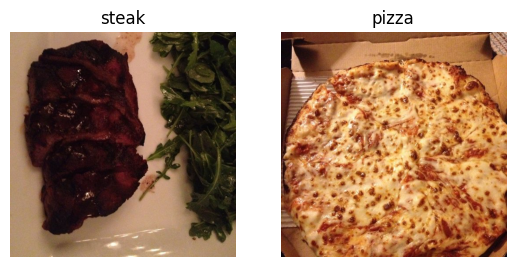

In [ ]:
# Visualize data
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

### 2. Preprocess the data 
Prapare data for the model

In [15]:
# Define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Our next step is to turn our data into batches

A batch is a small subset of data. Rather than look at all 10,000 images at one time, a mode might only look at 32 at a time.

It does this for a couple of reasons.
1. 10,000 image (or more) might not fit into the memory of your processor (GPU)
2. Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.

Why 32?
It's good for your health.

In [ ]:
# Create train and test data generators and rescale the data

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
train_data = train_datagen.flow_from_directory(
    directory=train_dir, # target directory of images
    target_size=(224, 224), # target size of images (height, width)
    class_mode="binary", # type of classification of data
    batch_size=32, # batch size bundle
)

test_data = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(224, 224),
    class_mode="binary",
    batch_size=32,
)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Get a sample of train data batch

images, labels = train_data.next()
len(images), len(labels)

(32, 32)

In [ ]:
len(train_data)

47

In [ ]:
# Get the first two images
images[0], images[0].shape

(array([[[0.        , 0.00784314, 0.01176471],
         [0.00784314, 0.        , 0.01960784],
         [0.01568628, 0.        , 0.01176471],
         ...,
         [0.00784314, 0.00392157, 0.        ],
         [0.00392157, 0.        , 0.        ],
         [0.        , 0.        , 0.00784314]],
 
        [[0.        , 0.01176471, 0.        ],
         [0.00784314, 0.        , 0.01176471],
         [0.01568628, 0.        , 0.01960784],
         ...,
         [0.00784314, 0.00392157, 0.        ],
         [0.00392157, 0.        , 0.        ],
         [0.        , 0.        , 0.00784314]],
 
        [[0.        , 0.01176471, 0.        ],
         [0.00784314, 0.        , 0.00392157],
         [0.01568628, 0.        , 0.02352941],
         ...,
         [0.00784314, 0.00392157, 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.00784314]],
 
        ...,
 
        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.     

In [ ]:
# First batch labels
labels

array([1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0.],
      dtype=float32)

### 3. Create a CNN model (start with a baseline)

A baseline is a relatively simple model or existing result that you setup when beginning a machine learning experiment and then as you keep experimenting, you try to beat the baseline.

*Note* In deep learning, there is almost an infinite amount of architectures yo could create. So one of the best ways to get started is to start with something simple and see if it works on your data nad then introduce complexity as required (e.g. look which current model is perfomring best in the field for your problem)

In [16]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
# Create the model (this will be our baseline, a layer convolutional neural network)
model_4 = Sequential([
  Conv2D(filters=10, # filter is the number of sliding windows going across an input (higher = more complex model)
         kernel_size=(3, 3), # the size of the sliding window going across an input
         strides=(1, 1), # the size of the step the sliding window takes across an input 
         padding="valid", # if "same", output shape is same as input shape, if "valid", output shape gets compressed
         activation="relu",
         input_shape=(224, 224, 3)), # input layer (specify input shape)
  Conv2D(10, 3, activation="relu"),
  Conv2D(10, 3, activation="relu"),
  Flatten(),
  Dense(1, activation="sigmoid") # output layer (working with binary classification so only 1 output neuron)                 
])

In [ ]:
# Compile the model
model_4.compile(
    loss="binary_crossentropy",
    optimizer=Adam(),
    metrics=["accuracy"]
)

In [ ]:
# Get model summary
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_13 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 conv2d_14 (Conv2D)          (None, 218, 218, 10)      910       
                                                                 
 flatten_4 (Flatten)         (None, 475240)            0         
                                                                 
 dense_3 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


### 4. Fit the model

In [ ]:
# Check the lengths of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [ ]:
# Fit the model
history_4 = model_4.fit(
    train_data, # this is a combination of train and test data batches
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/5
47/47 [==============================] - 26s 291ms/step - loss: 0.5964 - accuracy: 0.6900 - val_loss: 0.4833 - val_accuracy: 0.7680
Epoch 2/5
47/47 [==============================] - 12s 260ms/step - loss: 0.4157 - accuracy: 0.8227 - val_loss: 0.4058 - val_accuracy: 0.8240
Epoch 3/5
47/47 [==============================] - 11s 229ms/step - loss: 0.2985 - accuracy: 0.8900 - val_loss: 0.3606 - val_accuracy: 0.8320
Epoch 4/5
47/47 [==============================] - 11s 234ms/step - loss: 0.1786 - accuracy: 0.9400 - val_loss: 0.5385 - val_accuracy: 0.7640
Epoch 5/5
47/47 [==============================] - 11s 232ms/step - loss: 0.1008 - accuracy: 0.9693 - val_loss: 0.5630 - val_accuracy: 0.7900


### 5. Evaluating our model

<Axes: >

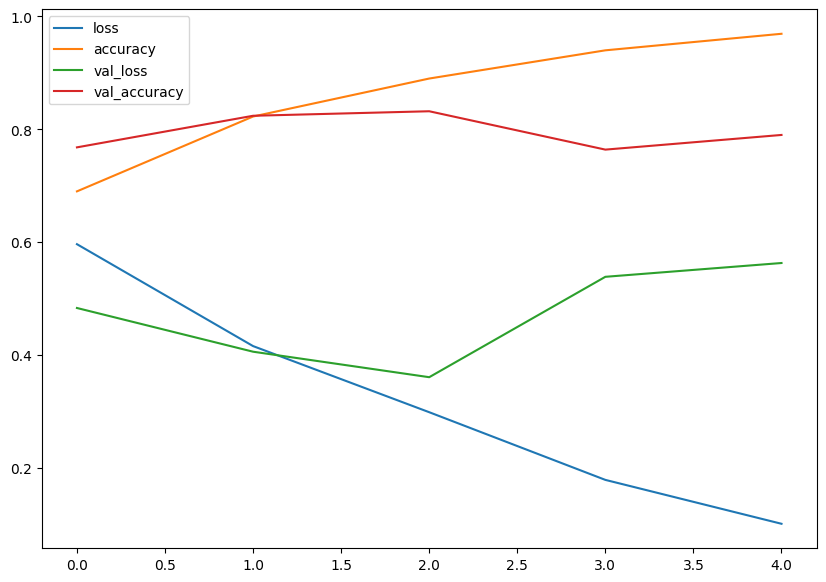

In [ ]:
import pandas as pd
# Let's plot training curves
pd.DataFrame(history_4.history).plot(figsize=(10, 7))

In [13]:
# Plot the validation and training curves separately
def plot_loss_curves(history):
  """
  returns separate loss curves for training and validation metrics
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  # Plot loss
  plt.figure()
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()


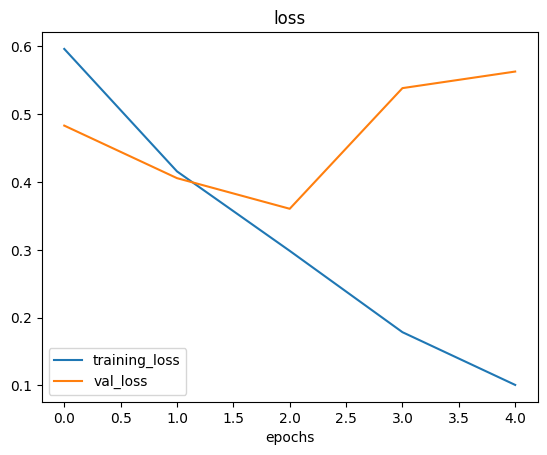

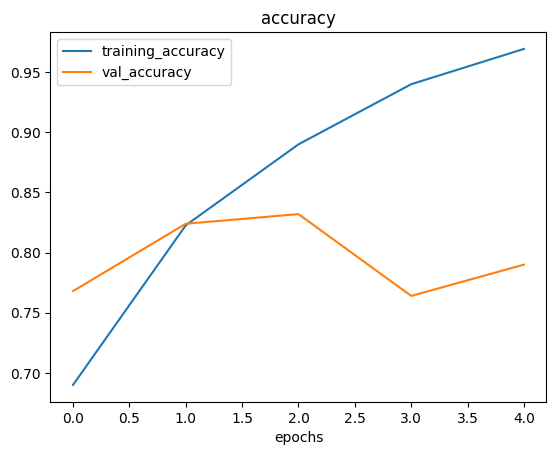

In [ ]:
# Check out the loss and accuracy of model 4
plot_loss_curves(history_4)

When a model's **validation loss starts to increase**, it's likely that the model is **overfitting** the training dataset. This means, it's learning the patterns in the training dataset *too well* and thus the model's ability to generelize to unseen dta will be diminished.

### 6. Adjust the model parameters

Fitting a machine learning model comes in 3 steps:

0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. reduce overfitting

Ways to induce overfitting:
* Increase the number of conv layars
* Increase the number of conv filters
* Add another dense layer to the output of our flattend layer

Reduce overfitting:
* Add data augmentation
* Add regularization layers (such as MaxPoll2D)
* Add more data...


Reducing overfitting is also known as **regularization**

In [ ]:
# Create the model (this is going to be our new baseline)
model_5 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [ ]:
# Compile the model
model_5.compile(
    loss='binary_crossentropy',
    optimizer=Adam(),
    metrics=["accuracy"]
)

In [ ]:
# Fit the model
history_5 = model_5.fit(
    train_data,
    steps_per_epoch=len(train_data),
    epochs=5,
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/5
47/47 [==============================] - 25s 241ms/step - loss: 0.5994 - accuracy: 0.6707 - val_loss: 0.4940 - val_accuracy: 0.7760
Epoch 2/5
47/47 [==============================] - 12s 247ms/step - loss: 0.5034 - accuracy: 0.7673 - val_loss: 0.4091 - val_accuracy: 0.8180
Epoch 3/5
47/47 [==============================] - 14s 292ms/step - loss: 0.4263 - accuracy: 0.8060 - val_loss: 0.3457 - val_accuracy: 0.8520
Epoch 4/5
47/47 [==============================] - 15s 310ms/step - loss: 0.3939 - accuracy: 0.8293 - val_loss: 0.3527 - val_accuracy: 0.8660
Epoch 5/5
47/47 [==============================] - 11s 226ms/step - loss: 0.3827 - accuracy: 0.8413 - val_loss: 0.3448 - val_accuracy: 0.8400


In [ ]:
# Get a summary of our model with max pooling
model_5.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 26, 26, 10)      

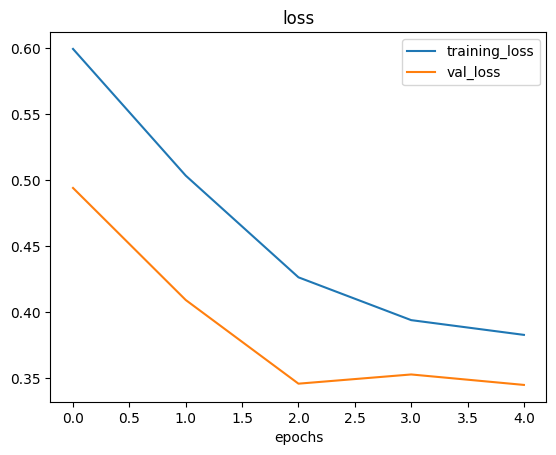

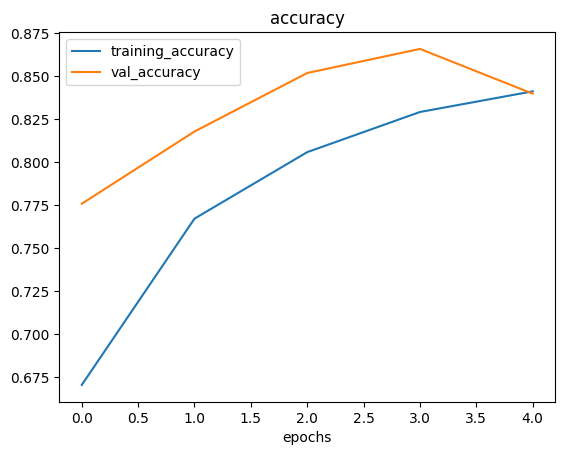

In [ ]:
# Plot loss curves
plot_loss_curves(history_5)

### Data Augmentation

Data Augmentation is the process of altering our training data, leading it to have more diversity and in turn allowing our mdoels to more generalziable patterns. Alterning might mean adjusting the rotation of an image, flipping it, cropping it or something similar.


Data augmentation is usually only performed on the training data. Using `ImageDataGenerator` built-in data augmentation parameters our images are left as tehy are in the directories but are modified as they're loaded in the model.

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(
    rescale=1/255.,
    rotation_range=0.2,
    shear_range=0.2, 
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)
# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation for test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

In [19]:
# Import data and augment it from training directory
print("Augmented training data:")
train_data_augmented = train_datagen_augmented.flow_from_directory(
    train_dir,
    batch_size=32,
    target_size=(224, 224),
    class_mode="binary",
    shuffle=False,
)

# Create non-augmented train data batches
print("Non-Augmented training data:")
train_data = train_datagen.flow_from_directory(
    train_dir,
    batch_size=32,
    target_size=(224, 224),
    class_mode="binary",
    shuffle=False,
)

# Create non-augmented train data batches
print("Non-Augmented test data:")
test_data = train_datagen.flow_from_directory(
    test_dir,
    batch_size=32,
    target_size=(224, 224),
    class_mode="binary",
    shuffle=False,
)

Augmented training data:
Found 1500 images belonging to 2 classes.
Non-Augmented training data:
Found 1500 images belonging to 2 classes.
Non-Augmented test data:
Found 500 images belonging to 2 classes.


In [ ]:
len(train_data_augmented), len(train_data)

(47, 47)

In [ ]:
# Get sample data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

Text(0.5, 1.0, 'Augmented Image')

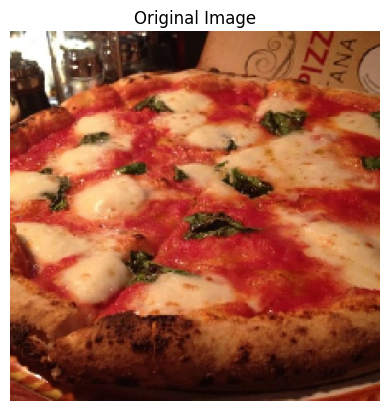

In [ ]:
# Show original image an augmented image
import random
random_number = random.randint(0, 31) 
plt.imshow(images[random_number])
plt.title('Original Image')
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title("Augmented Image")

In [ ]:
# Create a model (same as model_5)
model_6 = Sequential([
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile the model
model_6.compile(
    loss='binary_crossentropy',
    optimizer=Adam(),
    metrics=["accuracy"]
)
# Fit the model
history_6 = model_6.fit(
    train_data_augmented,
    epochs=5,
    steps_per_epoch=(len(train_data_augmented)),
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/5
47/47 [==============================] - 27s 523ms/step - loss: 0.7153 - accuracy: 0.4373 - val_loss: 0.6892 - val_accuracy: 0.5620
Epoch 2/5
47/47 [==============================] - 24s 520ms/step - loss: 0.6941 - accuracy: 0.5233 - val_loss: 0.6845 - val_accuracy: 0.6180
Epoch 3/5
47/47 [==============================] - 24s 520ms/step - loss: 0.6950 - accuracy: 0.4587 - val_loss: 0.6916 - val_accuracy: 0.5940
Epoch 4/5
47/47 [==============================] - 24s 519ms/step - loss: 0.6930 - accuracy: 0.5493 - val_loss: 0.6796 - val_accuracy: 0.5580
Epoch 5/5
47/47 [==============================] - 26s 556ms/step - loss: 0.6944 - accuracy: 0.5627 - val_loss: 0.6634 - val_accuracy: 0.6920


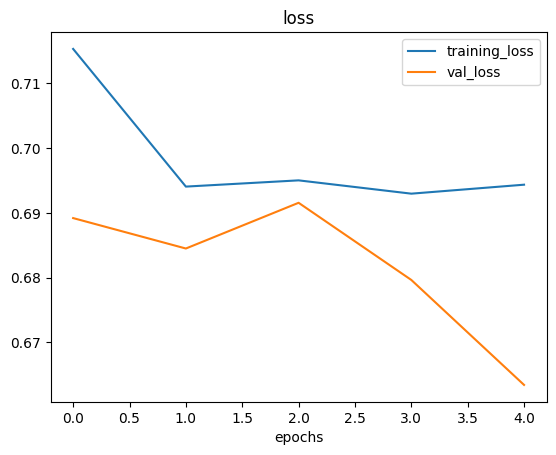

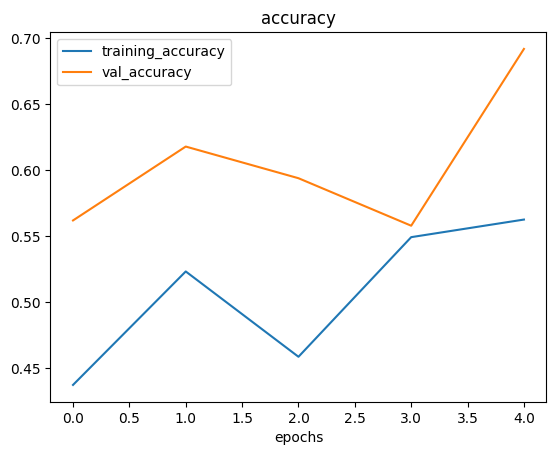

In [ ]:
# Check out models training curves
plot_loss_curves(history_6)

Let's shuffle our augmented training data and train another model (the same as before) and see what happens

In [20]:
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(
    train_dir,
    batch_size=32,
    target_size=(224, 224),
    class_mode="binary",
    shuffle=True,
)

Found 1500 images belonging to 2 classes.


In [27]:
# Create a model (same as model_5)
model_7 = Sequential([
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile the model
model_7.compile(
    loss='binary_crossentropy',
    optimizer=Adam(),
    metrics=["accuracy"]
)
# Fit the model
history_7 = model_7.fit(
    train_data_augmented_shuffled,
    epochs=5,
    steps_per_epoch=(len(train_data_augmented_shuffled)),
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/5
47/47 [==============================] - 77s 2s/step - loss: 0.6500 - accuracy: 0.6073 - val_loss: 0.6780 - val_accuracy: 0.5360
Epoch 2/5
47/47 [==============================] - 64s 1s/step - loss: 0.5453 - accuracy: 0.7220 - val_loss: 0.4155 - val_accuracy: 0.8260
Epoch 3/5
47/47 [==============================] - 72s 2s/step - loss: 0.4869 - accuracy: 0.7687 - val_loss: 0.3884 - val_accuracy: 0.8480
Epoch 4/5
47/47 [==============================] - 74s 2s/step - loss: 0.4744 - accuracy: 0.7773 - val_loss: 0.3534 - val_accuracy: 0.8600
Epoch 5/5
47/47 [==============================] - 70s 1s/step - loss: 0.4736 - accuracy: 0.7827 - val_loss: 0.3367 - val_accuracy: 0.8780


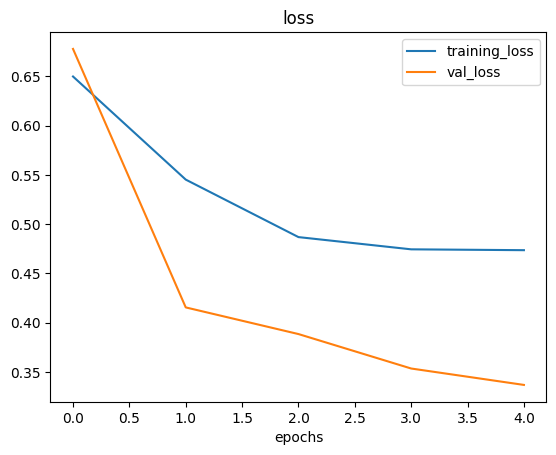

In [28]:
# Check out models training curves
plot_loss_curves(history_7)

### 7. Rpeat Until satisfied

Since we've already beaten our baseline, there are a few things we could try ot continue to improve our model

* Increase the number of model layers (e.g. add more `Conv2D`, `MaxPool2D`, layers)
* Increase the number of filters in each convoluational layer (eg from 10 to 32 or 64)
* Train for longer (more epochs)
* Find an ideal learning rate
* Get more data (Give the model More opportunities to learn)
* Use **transfer learning** to leverage what another image model has learn and adjust it for our own use case.

## Making a prediction with our trained model on our own custom data

In [24]:
# Classes we're workign with
print(class_names)

['pizza' 'steak']


--2023-04-05 01:47:52--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.02s   

2023-04-05 01:47:52 (83.8 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



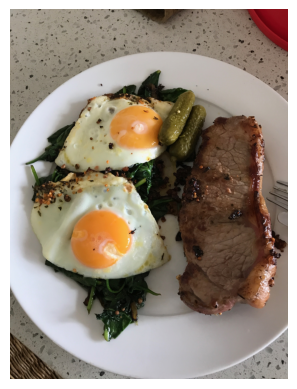

In [12]:
# View our example image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg 
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);
     

In [25]:
steak.shape

(4032, 3024, 3)

When you train a neural network and you want to make a prediction with it on your own custom data, it's important that your custom data (or new data) is preprocessed into the same format as the data your model is trained on

In [33]:
# Create a function to import and image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor and reshapes it 
  to (img_shape, img_shape, colour_channels).
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode the read fiel into a tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])
  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [35]:
# Load in and preprocess our custom image
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [37]:
expanded_steak = tf.expand_dims(steak, axis=0)
steak.shape, expanded_steak.shape

(TensorShape([224, 224, 3]), TensorShape([1, 224, 224, 3]))

In [41]:
pred = model_7.predict(expanded_steak)
pred

1/1 [==============================] - 0s 53ms/step


array([[0.7998457]], dtype=float32)

In [42]:
# We can index the predicted class by rounding the prediciton probability 

pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [43]:
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model
  and plots the image with the predicted class as the title.
  """
  # Import the target image and preproccess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 32ms/step


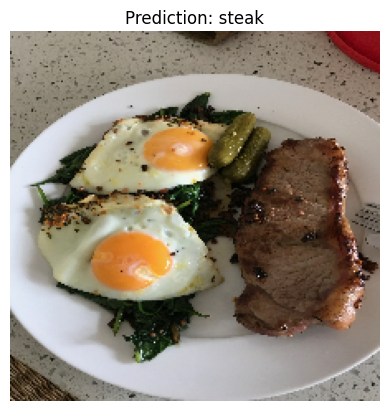

In [44]:
# Test our model on a custom image
pred_and_plot(model_7, "03-steak.jpeg")

--2023-04-05 02:14:09--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.03s   

2023-04-05 02:14:09 (102 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]

1/1 [==============================] - 0s 31ms/step


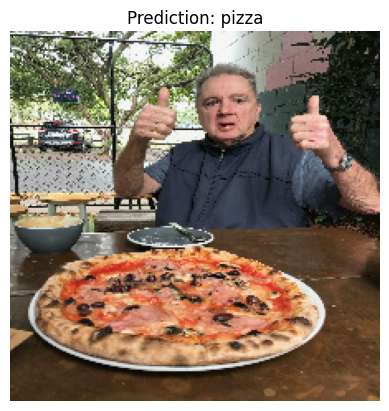

In [45]:
# Download another test custom image and make a prediction on it
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_7, "03-pizza-dad.jpeg")

## Multi-class Image Classification

We've just been through a bunch of the following steps with a binary classification problem (pizza vs. steak), now we're going to step things up a notch with 10 classes of food (multi-class classification).

1. Become one with the data
2. Preprocess the data (get it ready for a model)
3. Create a model (start with a baseline)
4. Fit the model (overfit it to make sure it works)
5. Evaluate the model
6. Adjust differet hyperparameters and improve the model (try to beat baseline/reduce overfitting)
7. Repeat until **satisfied**

### 1. Import and become one with the data

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip our data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-04-05 02:23:37--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.10.128, 142.251.12.128, 172.217.194.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.10.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  24.3MB/s    in 22s     

2023-04-05 02:23:59 (22.4 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [2]:
import os

# Walk through 10 classes of food image data
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")
     

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.

In [3]:
# Setup the train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [4]:
# Let's get the class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)
     

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


Image shape (384, 512, 3)


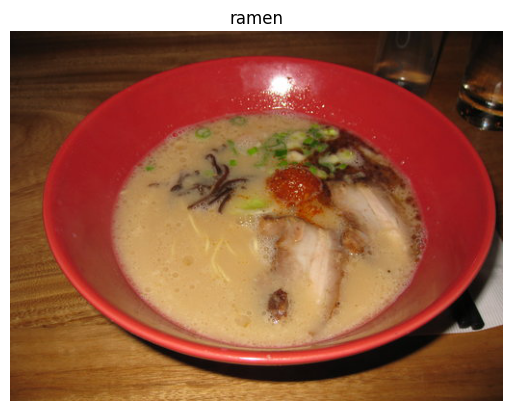

In [6]:
# Visualize, visualize, visualize
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

### 2. Preprocess the data (prepare it for a model)

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="categorical")

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode="categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### 3. Create a model (start with a baseline)
We've been talking a lot about the CNN explainer website... how about we just take their model (also on 10 classes) and use it for our problem...?

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation

# Create our model (very similar to previous models but actually the same as CNN explainer website)
model_8 = Sequential([
    Conv2D(10, 3, input_shape=(224,224,3)),
    Activation(activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax')
])

# Compile the model
model_8.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

4. Fit a model

In [10]:
# Fit the model
history_8 = model_8.fit(train_data, # now 10 different classes
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 68s 239ms/step - loss: 2.1412 - accuracy: 0.2121 - val_loss: 2.0283 - val_accuracy: 0.2748
Epoch 2/5
235/235 [==============================] - 51s 215ms/step - loss: 1.9235 - accuracy: 0.3300 - val_loss: 1.9322 - val_accuracy: 0.3228
Epoch 3/5
235/235 [==============================] - 50s 214ms/step - loss: 1.7459 - accuracy: 0.3907 - val_loss: 1.9324 - val_accuracy: 0.3284
Epoch 4/5
235/235 [==============================] - 58s 248ms/step - loss: 1.5337 - accuracy: 0.4724 - val_loss: 2.0109 - val_accuracy: 0.3212
Epoch 5/5
235/235 [==============================] - 50s 213ms/step - loss: 1.3243 - accuracy: 0.5473 - val_loss: 2.1158 - val_accuracy: 0.3240


### 5. Evaulate the model

In [11]:
# Evalaute on the test data
model_8.evaluate(test_data)

79/79 [==============================] - 13s 159ms/step - loss: 2.1158 - accuracy: 0.3240


[2.1158366203308105, 0.3240000009536743]

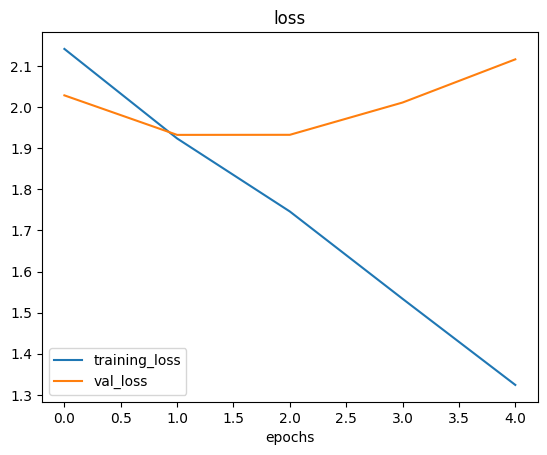

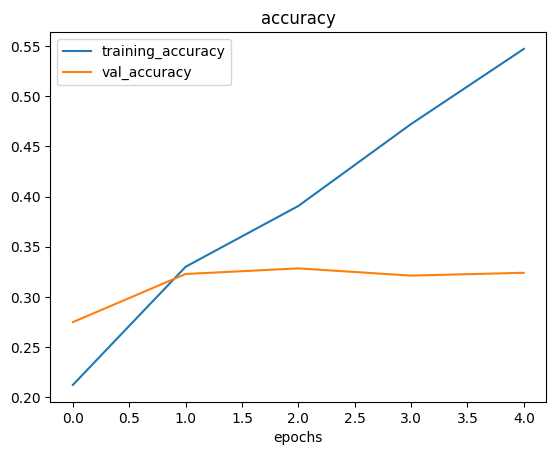

In [14]:
# Check out the model's loss curves on the 10 classes
plot_loss_curves(history_8)

What do these loss curves tell us?

Well... it seems our model is overfitting the training set quite badly... in other words, it's getting great results on the training daa but fails to generalize well to unseen data and performs poorly on the test dataset.

### 6. Adjust the model hyperparameters (to beat the baseline/reduce overfitting)
Due to its performance on the training data, it's clear our model is learning something...

However, it's not generalizing well to unseen data (overfitting).

So, let's try and fix overfitting by...

* **Get more data** - having more data gives a model more opportunity to learn diverse patterns...
* **Simpliy the model** - if our current model is overfitting the data, it may be too complicated of a model, one way to simplify a model is to: reduce # of layers or reduce # hidden units in layers
* **Use data augmentation** - data augmentaiton manipulates the training data in such a way to add more diversity to it (without altering the original data)
* **Use transfer learning** - transfer learning leverages the patterns another model has learned on similar data to your own and allows you to use those patterns on your own dataset

In [16]:
# How about we try and simplify the model first?
# Let's try to remove 2 convolutional layers...
model_9 = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation="softmax")
])

model_9.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [17]:
# Fit the model with 2x conv layers removed
history_9 = model_9.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 50s 207ms/step - loss: 2.2521 - accuracy: 0.1833 - val_loss: 2.0632 - val_accuracy: 0.2540
Epoch 2/5
235/235 [==============================] - 48s 206ms/step - loss: 1.9855 - accuracy: 0.2996 - val_loss: 2.0473 - val_accuracy: 0.2672
Epoch 3/5
235/235 [==============================] - 48s 203ms/step - loss: 1.7052 - accuracy: 0.4231 - val_loss: 2.0775 - val_accuracy: 0.2772
Epoch 4/5
235/235 [==============================] - 53s 226ms/step - loss: 1.2642 - accuracy: 0.5837 - val_loss: 2.2455 - val_accuracy: 0.2708
Epoch 5/5
235/235 [==============================] - 51s 215ms/step - loss: 0.8044 - accuracy: 0.7537 - val_loss: 2.7245 - val_accuracy: 0.2620


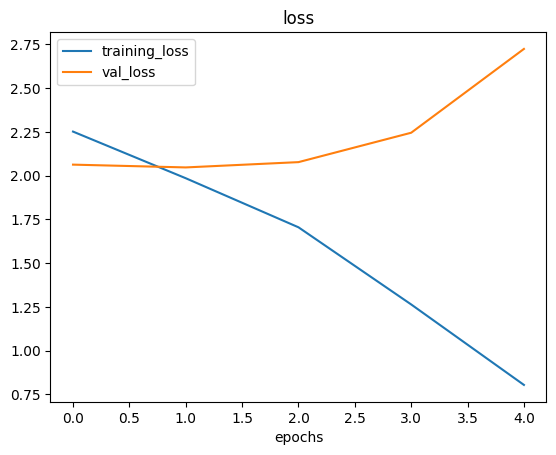

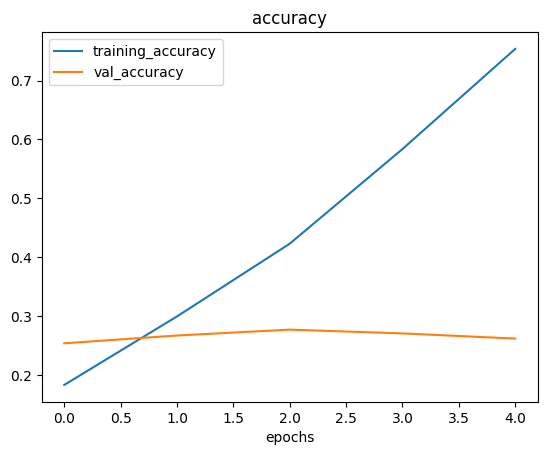

In [18]:
# Check out the loss curves of model_9
plot_loss_curves(history_9)

In [20]:
model_8.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 activation (Activation)     (None, 222, 222, 10)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 10)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 10)        9

In [19]:
model_9.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 29160)             0         
                                                                 
 dense_1 (Dense)             (None, 10)               

Looks like our "simplifying the model" experiment didn't work... the accuracy went down and overfitting continued...

### Trying to reduce overfitting with data augmentation
Let's try and improve our model's results by using augmented training data...

Ideally, we want to:

* Reduce overfitting (get the train and validation loss curves closer)
* Improve validation accuracy

In [21]:
# Create an augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode="categorical")

Found 7500 images belonging to 10 classes.


In [22]:
# Let's create another model but this time we'll fit it on the augmented training data of 10 classes
model_10 = tf.keras.models.clone_model(model_8)

# Compile the cloned model (using the same setup as previous models)
model_10.compile(loss="categorical_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

In [23]:
# Fit the model
history_10 = model_10.fit(train_data_augmented,
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 134s 560ms/step - loss: 2.2722 - accuracy: 0.1409 - val_loss: 2.1948 - val_accuracy: 0.1844
Epoch 2/5
235/235 [==============================] - 123s 524ms/step - loss: 2.1307 - accuracy: 0.2308 - val_loss: 2.0023 - val_accuracy: 0.2920
Epoch 3/5
235/235 [==============================] - 123s 522ms/step - loss: 2.0674 - accuracy: 0.2600 - val_loss: 1.9428 - val_accuracy: 0.3276
Epoch 4/5
235/235 [==============================] - 123s 525ms/step - loss: 2.0326 - accuracy: 0.2872 - val_loss: 1.9185 - val_accuracy: 0.3324
Epoch 5/5
235/235 [==============================] - 124s 527ms/step - loss: 2.0038 - accuracy: 0.3021 - val_loss: 1.9936 - val_accuracy: 0.3212


In [24]:
# Baseline results
model_8.evaluate(test_data)

79/79 [==============================] - 12s 155ms/step - loss: 2.1158 - accuracy: 0.3240


[2.115837812423706, 0.3240000009536743]

In [25]:
# Same model as baseline but with data augmentation turned on results
model_10.evaluate(test_data)

79/79 [==============================] - 12s 155ms/step - loss: 1.9936 - accuracy: 0.3212


[1.9936070442199707, 0.32120001316070557]

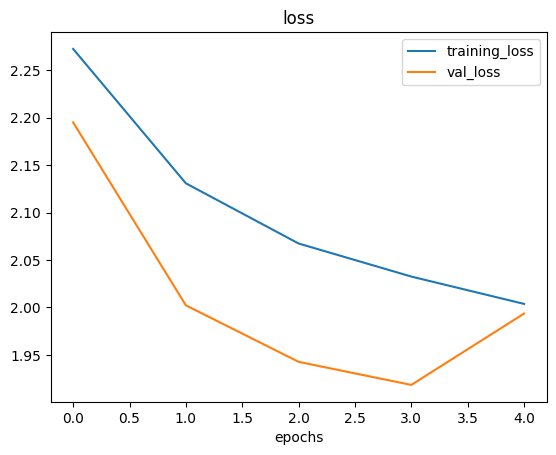

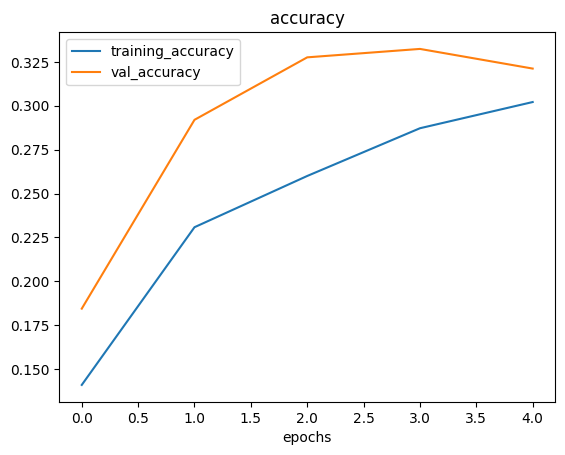

In [26]:
# Check out our model trained on augmented data's loss curves
plot_loss_curves(history_10)

In [27]:
model_10.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 activation (Activation)     (None, 222, 222, 10)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 10)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 10)        9

That looks much better, the loss curves are much closer to each other than the baseline model and they look like they're heading in the right direction (certainly not the wrong direction) so if we were to train for longer, we might see further improvements.

### 7. Repeat until satisfied
We could keep going here... continally trying to bring our loss curves closer together and trying to improve the validation/test accuracy.

How?

By running lots of experiemtns, namely:

* restructuring our model's architecture (increasing layers/hidden units)
* adjust the learning rate
* try different methods of data augmentation (adjust the hyperparameters in our ImageDataGenerator instance)
* training for longer (e.g. 10 epochs instead of 5 epochs)
* try transfer learning

### Making a prediction with our trained model
Let's use our trained model to make some predictions on our own custom images!

In [28]:
# Remind ourselves of the classes our model is trained on
class_names
     

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [29]:
# Download some custom images
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

--2023-04-05 03:27:14--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.01s   

2023-04-05 03:27:15 (215 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]

--2023-04-05 03:27:15--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting 

In [30]:
list(class_names)

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [31]:
# Reconfig pred_and_plot function to work with multi-class images
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model
  and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Add in logic for multi-class & get pred_class name
  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred[0]))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 19ms/step


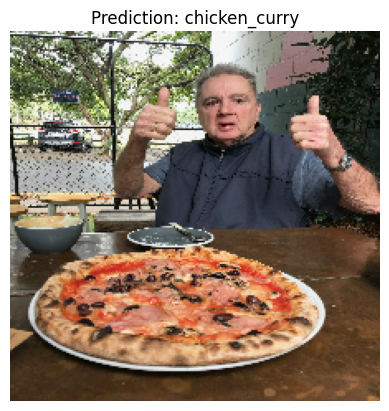

In [35]:
# Make a prediction using model_10
pred_and_plot(model=model_10,
              filename="03-pizza-dad.jpeg",
              class_names=class_names)

1/1 [==============================] - 0s 19ms/step


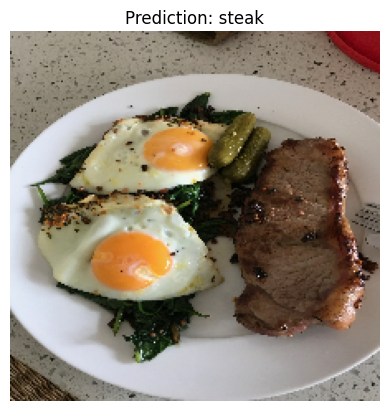

In [36]:
pred_and_plot(model=model_10,
              filename="03-steak.jpeg",
              class_names=class_names)
     

1/1 [==============================] - 0s 18ms/step


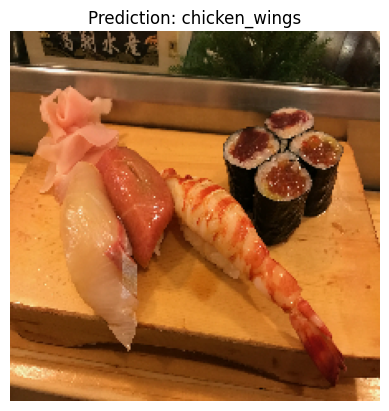

In [37]:
pred_and_plot(model=model_10,
              filename="03-sushi.jpeg",
              class_names=class_names)

1/1 [==============================] - 0s 32ms/step


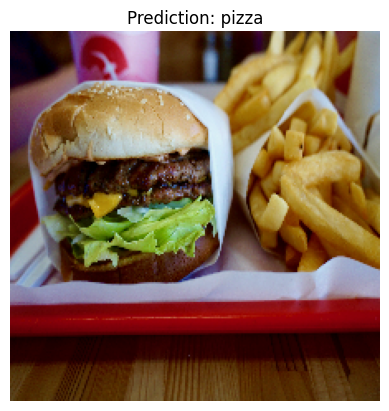

In [38]:
pred_and_plot(model=model_10,
              filename="03-hamburger.jpeg",
              class_names=class_names)

Looks like our model didn't perform very well on our custom images but this because it only achieved ~39% accuracy on the test data. So we can expect it to function quite poorly on other unseen data.

### Saving and loading our model

In [39]:
# Save a model
model_10.save("saved_trained_model_10")

In [40]:
# Load in a trained model and evaluate it
loaded_model_10 = tf.keras.models.load_model("saved_trained_model_10")
loaded_model_10.evaluate(test_data)

79/79 [==============================] - 14s 170ms/step - loss: 1.9936 - accuracy: 0.3212


[1.9936068058013916, 0.32120001316070557]

In [41]:
# Compare our loaded model to our existing model
model_10.evaluate(test_data)

79/79 [==============================] - 12s 154ms/step - loss: 1.9936 - accuracy: 0.3212


[1.993606686592102, 0.32120001316070557]